<a href="https://colab.research.google.com/github/johir-bd/Machine-Learning-Project/blob/master/customer_Behavior_analusis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customer Behavior Analysis in E-Commerce: Insights into Spending Patterns and Product Interactions

In [1]:
import pandas as pd

# Create a mock dataset
data = {
    'customer_id': [1, 1, 2, 2, 3, 3, 4, 4, 4],
    'product': ['A', 'B', 'A', 'C', 'B', 'D', 'B', 'C', 'A'],
    'purchase_amount': [50, 30, 20, 40, 60, 10, 20, 30, 40]
}

# Convert the dictionary into a DataFrame
df = pd.DataFrame(data)

print("Transaction Data:")
print(df)

Transaction Data:
   customer_id product  purchase_amount
0            1       A               50
1            1       B               30
2            2       A               20
3            2       C               40
4            3       B               60
5            3       D               10
6            4       B               20
7            4       C               30
8            4       A               40


In [2]:
# Calculate total and average spending per customer
customer_summary = df.groupby('customer_id').agg(
    total_spent=('purchase_amount', 'sum'),
    average_spent=('purchase_amount', 'mean')
).reset_index()

print("\nAverage Spending Per Customer:")
print(customer_summary)


Average Spending Per Customer:
   customer_id  total_spent  average_spent
0            1           80           40.0
1            2           60           30.0
2            3           70           35.0
3            4           90           30.0


In [3]:
# Count the occurrences of each product per customer
product_counts = df.groupby('product')['customer_id'].nunique().reset_index()
product_counts = product_counts.rename(columns={'customer_id': 'customer_count'})

print("\nProduct Purchase Counts:")
print(product_counts)

# Identify products frequently bought together
from itertools import combinations
from collections import Counter

# Create pairs of products purchased together by each customer
pairs = df.groupby('customer_id')['product'].apply(list).reset_index()
pairs['product_pairs'] = pairs['product'].apply(lambda x: list(combinations(sorted(x), 2)))
all_pairs = [pair for sublist in pairs['product_pairs'] for pair in sublist]

# Count the frequency of each pair
pair_counts = Counter(all_pairs)
pair_counts_df = pd.DataFrame(pair_counts.items(), columns=['product_pair', 'count']).sort_values(by='count', ascending=False)

print("\nFrequently Purchased Product Pairs:")
print(pair_counts_df)


Product Purchase Counts:
  product  customer_count
0       A               3
1       B               3
2       C               2
3       D               1

Frequently Purchased Product Pairs:
  product_pair  count
0       (A, B)      2
1       (A, C)      2
2       (B, D)      1
3       (B, C)      1


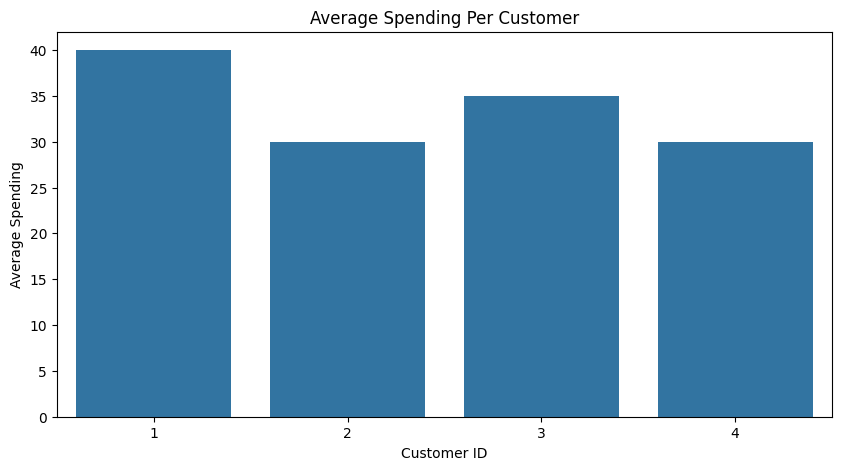

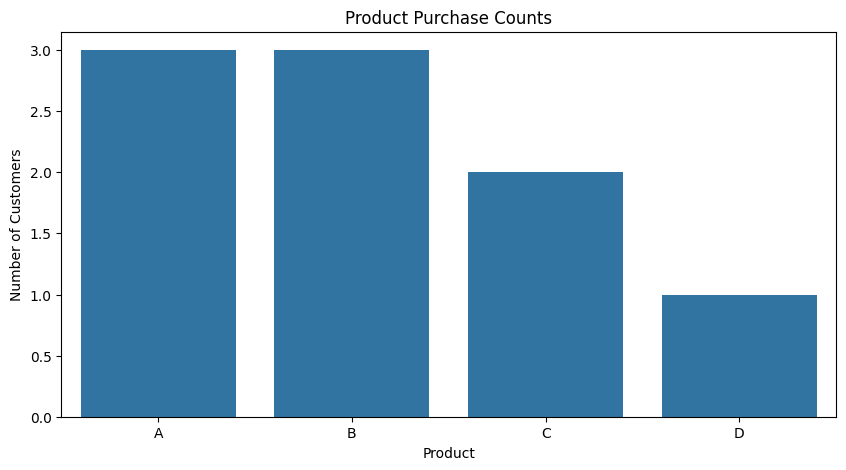

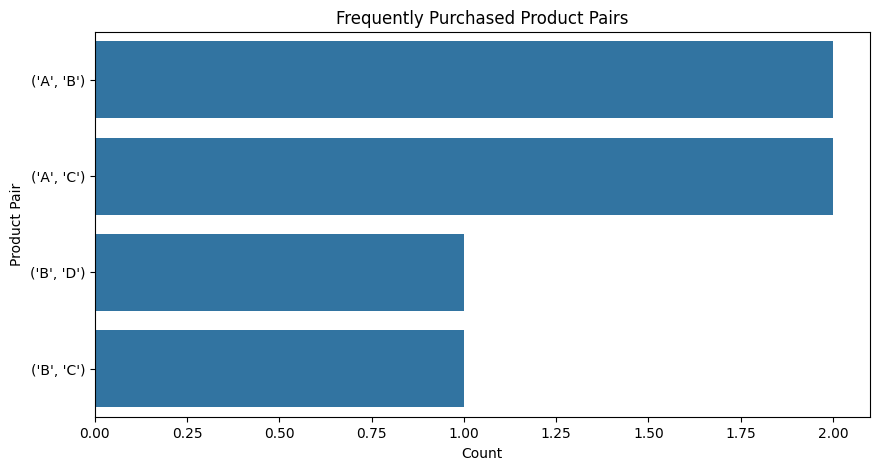

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for average spending per customer
plt.figure(figsize=(10, 5))
sns.barplot(x='customer_id', y='average_spent', data=customer_summary)
plt.title('Average Spending Per Customer')
plt.ylabel('Average Spending')
plt.xlabel('Customer ID')
plt.show()

# Bar chart for product purchase counts
plt.figure(figsize=(10, 5))
sns.barplot(x='product', y='customer_count', data=product_counts)
plt.title('Product Purchase Counts')
plt.ylabel('Number of Customers')
plt.xlabel('Product')
plt.show()

# Bar chart for frequently purchased product pairs
pair_counts_df['product_pair'] = pair_counts_df['product_pair'].astype(str)
plt.figure(figsize=(10, 5))
sns.barplot(x='count', y='product_pair', data=pair_counts_df.head(10))  # Plot top 10 pairs
plt.title('Frequently Purchased Product Pairs')
plt.xlabel('Count')
plt.ylabel('Product Pair')
plt.show()